In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
#############################
# Read Data
#############################

mnist_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Handwritten Digits Classification/ml_problems_1_train.csv")

X_train = mnist_train.loc[:, mnist_train.columns != 'label']
X_train = X_train.to_numpy()
y_train = mnist_train['label']
y_train = y_train.to_numpy()

In [3]:
#############################
# Data Transformation
#############################

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255

# one hot encode outputs
y_train = to_categorical(y_train)

# check the shapes
print(X_train.shape)
print(y_train.shape)

# reshape the data to fit the model
X_train = X_train.reshape(42000, 28, 28, 1)  # Depth=1 (Grey scale from white to black)
print(X_train.shape)

(42000, 784)
(42000, 10)
(42000, 28, 28, 1)


In [4]:
#############################
# Build & Fit the model
#############################

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # The loss function is used for more than 2 outputs

# Train the model
hist = model.fit(X_train, y_train, validation_split=0.20, batch_size=64, verbose=2, epochs=50)

Epoch 1/50
525/525 - 5s - loss: 0.2103 - accuracy: 0.9369 - val_loss: 0.0660 - val_accuracy: 0.9788
Epoch 2/50
525/525 - 1s - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0470 - val_accuracy: 0.9850
Epoch 3/50
525/525 - 1s - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0416 - val_accuracy: 0.9874
Epoch 4/50
525/525 - 1s - loss: 0.0263 - accuracy: 0.9910 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 5/50
525/525 - 1s - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 6/50
525/525 - 1s - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0401 - val_accuracy: 0.9887
Epoch 7/50
525/525 - 1s - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0469 - val_accuracy: 0.9871
Epoch 8/50
525/525 - 1s - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0461 - val_accuracy: 0.9885
Epoch 9/50
525/525 - 1s - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0447 - val_accuracy: 0.9885
Epoch 10/50
525/525 - 1s - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0517 - val_accuracy: 0.9874

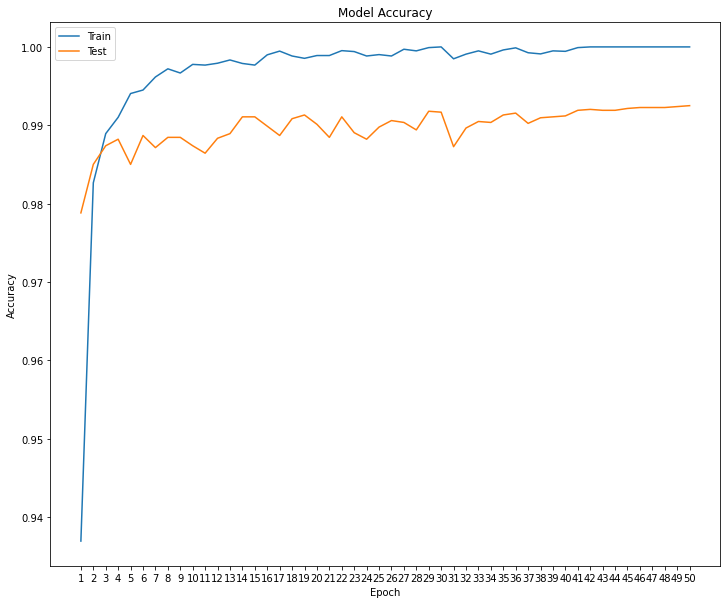

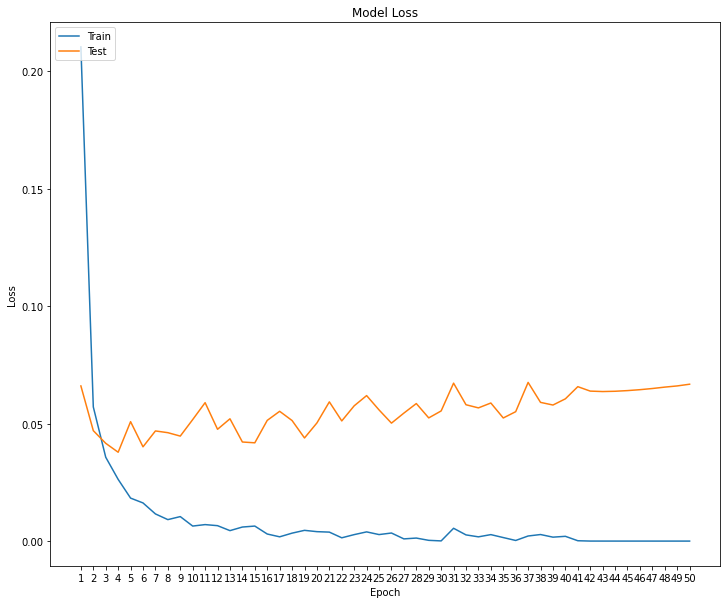

In [5]:
##################################
# Visualize the models accuracy
##################################

epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
         43, 44, 45, 46, 47, 48, 49, 50]
plt.figure(figsize=(12, 10))
dim = np.arange(50)
plt.xticks(dim, epoch)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc='upper left')
plt.show()

plt.figure(figsize=(12, 10))
dim = np.arange(50)
plt.xticks(dim, epoch)

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [6]:
##################################
# Test Dataset
##################################

mnist_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Handwritten Digits Classification/ml_problems_1_test.csv")

X_test = mnist_test[:]
X_test = X_test.to_numpy()

# normalize inputs from 0-255 to 0-1
X_test = X_test / 255

X_test = X_test.reshape(28000, 28, 28, 1)

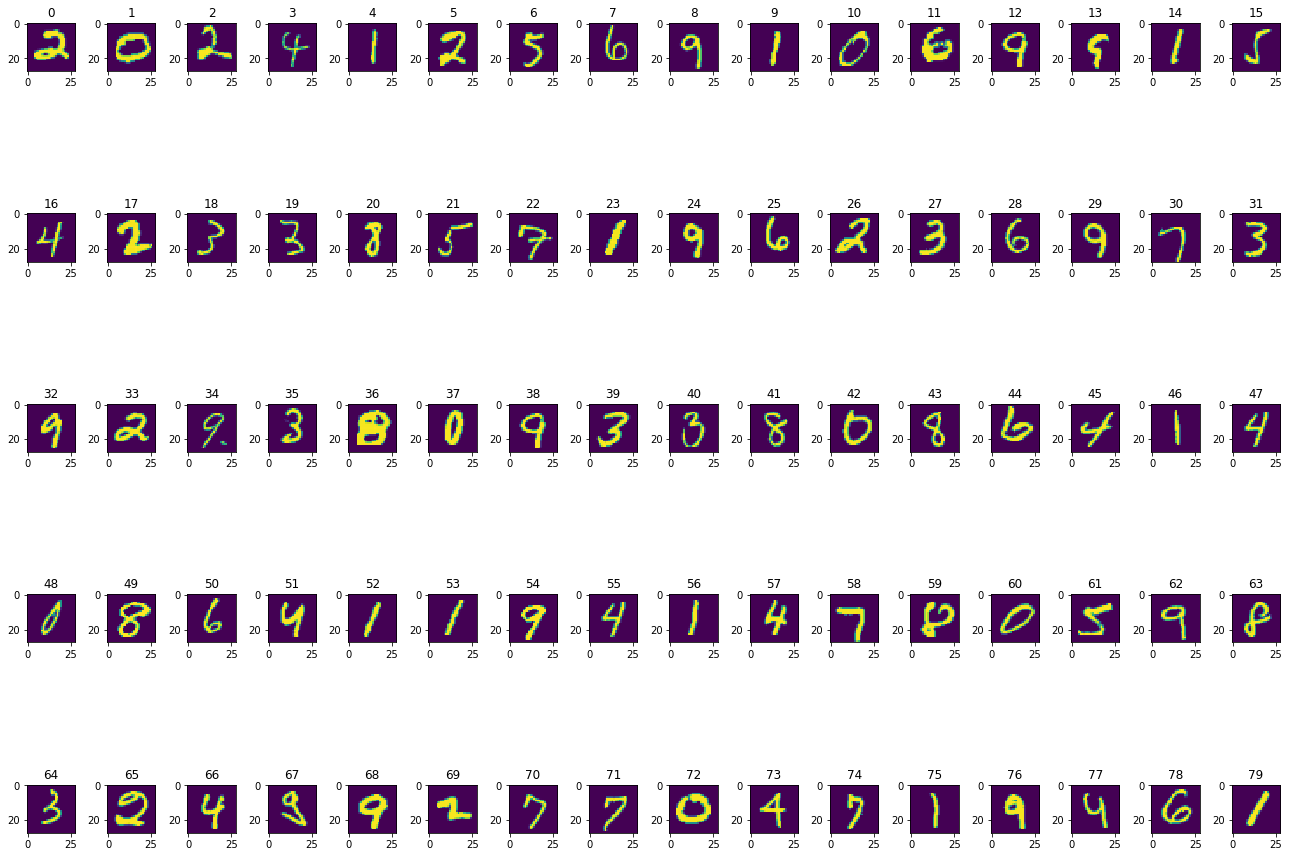

In [7]:
#####################################
# Manually & Randomly Select images
#####################################

random_selected_list = [0, 1, 55, 99, 200, 215, 354, 375, 400, 425, 475, 500, 250, 450, 525, 600, 700, 35, 155, 175, 181, 23, 5, 69, 77, 88,
                        26, 7, 70, 27995, 27996, 27997, 27998, 27999, 2, 4, 75, 225, 250, 515, 545, 625, 1000, 2000, 3000, 4000, 5000, 5500,
                        6000, 7000, 8000, 1100, 2200, 3300, 4400, 5500, 6600, 7700, 8800, 9900, 10000, 11000, 12000, 13000, 14000, 15000, 16000,
                        17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 66, 999, 888, 777, 666]

plt.figure(figsize=(18,14))
x, y = 16, 5
j = 0
for index in random_selected_list:
    plt.subplot(y, x, j+1)
    plt.imshow(X_test[index].reshape((28,28)), interpolation='nearest')
    plt.title(str(j))
    j += 1

plt.tight_layout()
plt.show()

In [8]:
#####################################
# Manually & Randomly Testing
#####################################

actual_digits = [2, 0, 2, 4, 1, 2, 5, 6, 9, 1, 0, 6, 9, 9, 1, 5,
                 4, 2, 3, 3, 8, 5, 7, 1, 9, 6, 2, 3, 6, 9, 7, 3,
                 9, 2, 9, 3, 8, 0, 9, 3, 3, 8, 0, 8, 6, 4, 1, 4,
                 0, 8, 6, 4, 1, 1, 9, 4, 1, 4, 7, 8, 0, 5, 9, 8,
                 3, 2, 4, 9, 9, 2, 7, 7, 0, 4, 7, 1, 9, 4, 6, 1]

# compare with  predicted outcome
y_pred = model.predict(X_test, verbose=2)
pred = np.argmax(y_pred, axis=1)

Correct, Incorrect = 0, 0
for index in range(len(actual_digits)):
    if actual_digits[index] == pred[random_selected_list[index]]:
        Correct += 1
    else:
        Incorrect += 1

print("Number of Correct Predictions: {0}\nNumber of Incorrect Predictions: {1}".format(Correct, Incorrect))
print("Accuracy is {0}".format(Correct / len(actual_digits)))

875/875 - 1s
Number of Correct Predictions: 78
Number of Incorrect Predictions: 2
Accuracy is 0.975


In [9]:
################################
# For the submission
################################

from google.colab import files

submission = pd.DataFrame({'ImageId': range(1, len(X_test)+1), 'Label': pred})
# print(submission.to_csv)

submission.to_csv("submission_1.csv", index=False)
files.download("submission_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>